In [22]:
abs_path = r'C:\Users\Assel\Desktop\ML_trial2.csv'
from pandas import read_csv
df = read_csv(abs_path)
df.head

<bound method NDFrame.head of         VAR1   VAR2  LABEL  VAR3
0          1   0.01      6     1
1          1   0.02      5     2
2          1   0.03      5     3
3          1   0.04     42     4
4          1   0.05     81     5
5          1   0.06     71     6
6          1   0.07     78     7
7          1   0.08     69     8
8          1   0.09     53     9
9          1   0.10     42    10
10         1   0.11     63    11
11         1   0.12     75    12
12         1   0.13     59    13
13         1   0.14     73    14
14         1   0.15     79    15
15         0   0.16     57    16
16         0   0.17    106    17
17         0   0.18     88    18
18         0   0.19     68    19
19         0   0.20     29    20
20         0   0.21     38    21
21         0   0.22     58    22
22         0   0.23     58    23
23         0   0.24     38    24
24         0   0.25     43    25
25         0   0.26     79    26
26         0   0.27     21    27
27         0   0.28     44    28
28         0 

In [12]:
df['VAR2'];

In [7]:
from numpy import reshape
X = df['VAR2'].values
y = df['LABEL'].values
X = X.reshape(-1,1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
RANDOM_STATES = 1234
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)

In [8]:
clf = RandomForestRegressor()
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

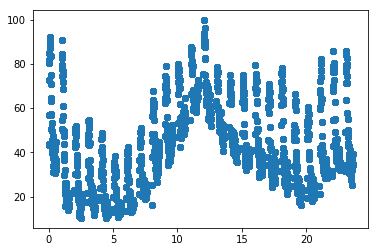

In [9]:
yy_test = clf.predict(X_test)
%matplotlib inline
from matplotlib.pyplot import subplots

fig, ax = subplots()

ax.scatter(X_test,yy_test)

In [23]:
from numpy import meshgrid
v1 = df['VAR2'].values
v2 = df['VAR1'].values

v1 = v1.reshape(-1,1)
v2 = v2.reshape(-1,1)
v1.shape

from numpy import concatenate

y = df['LABEL'].values

X = concatenate((v1,v2), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)
clf = RandomForestRegressor()

clf.fit(X_train,y_train)
yy_test = clf.predict(X_test)
X_test.shape

(43200, 2)

In [24]:
from numpy import mgrid


grid_step = 0.01

grid_a, grid_b = mgrid[0:1:grid_step, 0.01:23.6:grid_step]


print('Grid A shape:', grid_a.shape, '- size:', grid_a.size)
print('Grid B shape:', grid_b.shape, '- size:', grid_b.size)

from numpy import c_

grid_a_flat = grid_a.ravel()
grid_b_flat = grid_b.ravel()


new_obs = c_[grid_a_flat, grid_b_flat]


print('Shape:', new_obs.shape, '- size:', new_obs.size)

Grid A shape: (100, 2359) - size: 235900
Grid B shape: (100, 2359) - size: 235900
Shape: (235900, 2) - size: 471800


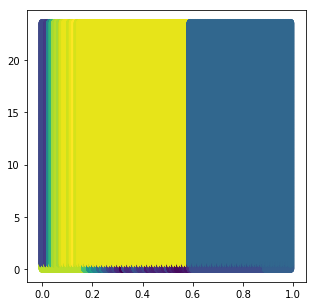

In [25]:
predictions = clf.predict(new_obs)
fig, ax = subplots(figsize=(5, 5))
feature_a, feature_b = 0,1
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1);


cax= ax.scatter(new_obs[:, feature_a], new_obs[:, feature_b], c=predictions);

# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1);


In [157]:
clf.feature_importances_

array([0.75853617, 0.24146383])

In [79]:
X_test.shape
grid_shape = X_test[:,1].shape
yy_test_grid = yy_test.reshape(grid_shape)
yy_test_grid.shape

(43200,)

In [ ]:
V1_train, V1_test, y1_train, y1_test = train_test_split(v1,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)
V2_train, V2_test, y2_train, y2_test = train_test_split(v2,y, test_size=.3, random_state= RANDOM_STATES,shuffle = True)
g1,g2 = meshgrid(V1_train,V2_train)

g1_flat = g1.ravel()
g2_flat = g2.ravel()

X_t